In [20]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [21]:
path = "../data_for_plots/" 

In [22]:
HT = xr.open_mfdataset(path + "mean_heat_transports_0201-01-01_0300-12-30_zonal_vertical_integral.nc")
SIarea = xr.open_mfdataset(path + "SIarea_0201-01-01_0300-12-30_JJA_zonal_mean.nc")

In [23]:
SIedge15 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.15) + 10).values
SIedge80 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.80) + 10).values

In [24]:
MHTminusSTD = HT.MHT - HT.MHTstd
MHTplusSTD = HT.MHT + HT.MHTstd
THTminusSTD = HT.THT - HT.THTstd
THTplusSTD = HT.THT + HT.THTstd
totalHTminusSTD = HT.totalHT - HT.totalHTstd
totalHTplusSTD = HT.totalHT + HT.totalHTstd

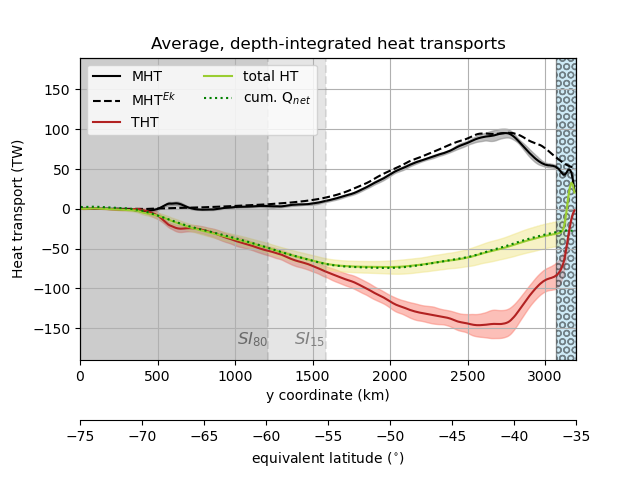

In [25]:
fig, ax = plt.subplots(1)

HT.MHT.plot(label="MHT", color="k")
ax.fill_between(HT.YG, MHTminusSTD, MHTplusSTD, color="gray", alpha=0.5)
HT.MHTek.plot(label="MHT$^{Ek}$", color="k", ls="--")
HT.THT.plot(label="THT", color="firebrick")
ax.fill_between(HT.YG, THTminusSTD, THTplusSTD, color="salmon", alpha=0.5)
HT.totalHT.plot(label="total HT", color="yellowgreen")
ax.fill_between(HT.YG, totalHTminusSTD, totalHTplusSTD, color="khaki", alpha=0.5)

HT.OQ.plot(label="cum. Q$_{net}$", color="green", ls=":")

plt.legend(loc=2, ncol=2)
plt.grid()
plt.title("Average, depth-integrated heat transports")
plt.ylabel("Heat transport (TW)")
plt.xticks(np.arange(0, 3.2e6, 0.5e6), np.arange(0, 3200, 500))
plt.xlabel("y coordinate (km)")
plt.xlim(0, 3.2e6)
plt.ylim(-190, 190)

ax.vlines(SIedge15, -190, 190,  colors='gray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -190), SIedge15, 380, alpha=0.2, facecolor="gray", edgecolor=None))
ax.text(SIedge15, -170, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax.vlines(SIedge80, -190, 190,  colors='dimgray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -190), SIedge80, 380, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax.text(SIedge80, -170, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax.add_patch(Rectangle((3.07e6, -190), 0.13e6, 380, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"));

adax = ax.twiny()
adax.spines.bottom.set_position(("axes", -0.2))
adax.set_xlim(-75, -35)
adax.set_xticks(np.linspace(-75, -35, 9))
adax.xaxis.tick_bottom()
adax.xaxis.set_label_position("bottom")
adax.set_xlabel("equivalent latitude ($^{\circ}$)")

plt.subplots_adjust(bottom=0.25)

plt.savefig("fig04-mean_total_THT.png", dpi=300)